# Metadata

| Attribute | Description                                                                                                         |
| --------- | ------------------------------------------------------------------------------------------------------------------- |
| Attr\_1   | Net profit / total assets                                                                                           |
| Attr\_2   | Total liabilities / total assets                                                                                    |
| Attr\_3   | Working capital / total assets                                                                                      |
| Attr\_4   | Current assets / short-term liabilities                                                                             |
| Attr\_5   | $(Cash + short-term securities + receivables − short-term liabilities) / (Operating expenses − depreciation)$ × 365 |
| Attr\_6   | Retained earnings / total assets                                                                                    |
| Attr\_7   | EBIT / total assets                                                                                                 |
| Attr\_8   | Book value of equity / total liabilities                                                                            |
| Attr\_9   | Sales / total assets                                                                                                |
| Attr\_10  | Equity / total assets                                                                                               |
| Attr\_11  | (Gross profit + extraordinary items + financial expenses) / total assets                                            |
| Attr\_12  | Gross profit / short-term liabilities                                                                               |
| Attr\_13  | (Gross profit + depreciation) / sales                                                                               |
| Attr\_14  | (Gross profit + interest) / total assets                                                                            |
| Attr\_15  | (Total liabilities × 365) / (Gross profit + depreciation)                                                           |
| Attr\_16  | (Gross profit + depreciation) / total liabilities                                                                   |
| Attr\_17  | Total assets / total liabilities                                                                                    |
| Attr\_18  | Gross profit / total assets                                                                                         |
| Attr\_19  | Gross profit / sales                                                                                                |
| Attr\_20  | (Inventory × 365) / sales                                                                                           |
| Attr\_21  | Sales (n) / Sales (n−1)                                                                                             |
| Attr\_22  | Profit on operating activities / total assets                                                                       |
| Attr\_23  | Net profit / sales                                                                                                  |
| Attr\_24  | Gross profit (in 3 years) / total assets                                                                            |
| Attr\_25  | (Equity − share capital) / total assets                                                                             |
| Attr\_26  | (Net profit + depreciation) / total liabilities                                                                     |
| Attr\_27  | Profit on operating activities / financial expenses                                                                 |
| Attr\_28  | Working capital / fixed assets                                                                                      |
| Attr\_29  | Logarithm of total assets                                                                                           |
| Attr\_30  | (Total liabilities − cash) / sales                                                                                  |
| Attr\_31  | (Gross profit + interest) / sales                                                                                   |
| Attr\_32  | (Current liabilities × 365) / cost of products sold                                                                 |
| Attr\_33  | Operating expenses / short-term liabilities                                                                         |
| Attr\_34  | Operating expenses / total liabilities                                                                              |
| Attr\_35  | Profit on sales / total assets                                                                                      |
| Attr\_36  | Total sales / total assets                                                                                          |
| Attr\_37  | (Current assets − inventories) / long-term liabilities                                                              |
| Attr\_38  | Constant capital / total assets                                                                                     |
| Attr\_39  | Profit on sales / sales                                                                                             |
| Attr\_40  | (Current assets − inventory − receivables) / short-term liabilities                                                 |
| Attr\_41  | Total liabilities / $(Profit on operating activities + depreciation) × (12 / 365)$                                  |
| Attr\_42  | Profit on operating activities / sales                                                                              |
| Attr\_43  | Rotation receivables + inventory turnover in days                                                                   |
| Attr\_44  | (Receivables × 365) / sales                                                                                         |
| Attr\_45  | Net profit / inventory                                                                                              |
| Attr\_46  | (Current assets − inventory) / short-term liabilities                                                               |
| Attr\_47  | (Inventory × 365) / cost of products sold                                                                           |
| Attr\_48  | EBITDA (profit on operating activities − depreciation) / total assets                                               |
| Attr\_49  | EBITDA (profit on operating activities − depreciation) / sales                                                      |
| Attr\_50  | Current assets / total liabilities                                                                                  |
| Attr\_51  | Short-term liabilities / total assets                                                                               |
| Attr\_52  | (Short-term liabilities × 365) / cost of products sold                                                              |
| Attr\_53  | Equity / fixed assets                                                                                               |
| Attr\_54  | Constant capital / fixed assets                                                                                     |
| Attr\_55  | Working capital                                                                                                     |
| Attr\_56  | (Sales − cost of products sold) / sales                                                                             |
| Attr\_57  | (Current assets − inventory − short-term liabilities) / (Sales − gross profit − depreciation)                       |
| Attr\_58  | Total costs / total sales                                                                                           |
| Attr\_59  | Long-term liabilities / equity                                                                                      |
| Attr\_60  | Sales / inventory                                                                                                   |
| Attr\_61  | Sales / receivables                                                                                                 |
| Attr\_62  | (Short-term liabilities × 365) / sales                                                                              |
| Attr\_63  | Sales / short-term liabilities                                                                                      |
| Attr\_64  | Sales / fixed assets                                                                                                |
| bankrupt  | Whether company went bankrupt at end of forecasting period (2013)                                                   |


# Libraries

In [1]:
#!pip install -U scikit-learn imbalanced-learn xgboost
!pip uninstall -q -y category-encoders cesium
!pip install -q -U scikit-learn imbalanced-learn xgboost



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 83.6 MB/s eta 0:00:00


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pickle
import joblib
import shap
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import (
train_test_split,cross_val_score,
cross_validate,GridSearchCV
)
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

from ipywidgets import interact
import ipywidgets as widgets
pd.set_option('display.max_columns',None)

# EDA

In [4]:
df1 = pd.read_csv('/kaggle/input/bankruptcy-dataset/Bankruptcy Data 1 year.csv',index_col=0)
df2 = pd.read_csv('/kaggle/input/bankruptcy-dataset/Bankruptcy Data 2 year.csv',index_col=0)
df3 = pd.read_csv('/kaggle/input/bankruptcy-dataset/Bankruptcy Data 3 year.csv',index_col=0)
df4 = pd.read_csv('/kaggle/input/bankruptcy-dataset/Bankruptcy Data 4 year.csv',index_col=0)
df5 = pd.read_csv('/kaggle/input/bankruptcy-dataset/Bankruptcy Data 5 year.csv',index_col=0)

In [5]:
df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

In [6]:
df.isnull().sum()

bankrupt              0
forecast_window       0
Attr1                 8
Attr2                 8
Attr3                 8
                   ... 
Attr60             2152
Attr61              102
Attr62              127
Attr63              134
Attr64              812
Length: 66, dtype: int64

In [7]:
df.describe()

,bankrupt,forecast_window,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
count,43405.000000,43405.000000,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,43361.000000,43271.000000,43278.000000,43397.000000,4.336900e+04,43310.000000,43311.000000,43397.000000,43277.000000,4.327800e+04,37551.000000,43397.000000,43278.000000,42483.000000,43397.000000,43310.000000,4.064100e+04,42593.000000,43397.000000,43278.000000,43278.000000,4.303700e+04,43271.000000,43311.000000,43397.000000,43397.000000,24421.000000,43397.000000,43278.000000,43271.000000,42651.000000,43278.000000,4.327800e+04,4.327800e+04,41258.000000,43270.000000,4.310800e+04,43396.000000,43278.000000,43311.000000,43397.000000,43104.000000,42593.000000,42593.000000,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000
mean,0.048174,3.060247,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,0.131075,1.132430,0.809544,0.093489,1.991890e+03,1.411167,13.802535,0.098565,0.156277,2.430209e+02,3.884997,0.113923,0.138582,0.270012,0.392844,1.263864,1.107896e+03,6.003208,4.005020,7.370821,0.176847,1.162621e+03,8.636016,5.411439,0.111908,2.911241,105.085363,0.724357,-0.289102,2.147411,7.717806,-0.142514,1.074125e+03,8.311085e+02,14.825016,5.428857,3.578418e+02,0.028584,-0.482584,5.835373,0.483521,6.478459,23.772623,24.654700,7.672188e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592
std,0.214137,1.283975,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,5.306782,67.590296,86.944053,5.713075,9.643193e+04,68.519998,507.322101,5.737645,48.692154,3.754517e+04,228.668931,5.155778,48.334974,7.988151,12.891440,66.224124,3.501237e+04,153.468628,0.826857,814.490078,48.748410,9.559356e+04,118.991185,120.975110,4.783398,62.984347,3058.429830,14.749270,39.256360,56.029879,1398.837543,15.990988,1.472188e+05,1.100510e+05,2428.236110,295.356200,3.314634e+04,5.097322,45.152174,307.382687,5.438357,639.887467,1213.797976,1220.884065,7.005310e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482
min,0.000000,1.000000,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,-463.890000,-6331.800000,-1460.600000,-517.480000,-9.632400e+06,-6331.800000,-0.412920,-517.480000,-1578.700000,-2.934000e+01,-1325.000000,-431.590000,-1578.700000,-463.890000,-500.930000,-6331.800000,-2.590100e+05,-3829.900000,-0.886060,-6351.700000,-1495.600000,-9.295600e+03,-19.197000,-1696.000000,-431.590000,-0.000857,-525.520000,-479.910000,-7522.000000,-101.270000,-1234.400000,-1395.800000,-1.158700e+05,-1.158700e+05,-256230.000000,-101.260000,-9.611000e+01,-542.560000,-9001.000000,-0.045239,-0.186610,-25.467000,-3828.900000,-3828.900000,-1.805200e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000
25%,0.000000,2.000000,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,0.015409,0.015072,0.023881,0.005783,2.225800e+02,0.073476,1.451650,0.005783,0.003870,1.541325e+01,0.908225,0.000000,0.002269,0.021336,0.150100,0.066743,4.504800e-02,0.038214,3.495100,0.082753,0.006961,4.639500e+01,2.819900,0.305725,0.006038,1.101100,1.142300,0.419830,0.004165,0.052696,0.026679,0.000000,6.660850e+01,3.487775e+01,0.019168,0.607455,1.6225

In [8]:
df = pd.get_dummies(df, columns=['forecast_window'], prefix='fw')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bankrupt  43405 non-null  int64  
 1   Attr1     43397 non-null  float64
 2   Attr2     43397 non-null  float64
 3   Attr3     43397 non-null  float64
 4   Attr4     43271 non-null  float64
 5   Attr5     43316 non-null  float64
 6   Attr6     43397 non-null  float64
 7   Attr7     43397 non-null  float64
 8   Attr8     43311 non-null  float64
 9   Attr9     43396 non-null  float64
 10  Attr10    43397 non-null  float64
 11  Attr11    43361 non-null  float64
 12  Attr12    43271 non-null  float64
 13  Attr13    43278 non-null  float64
 14  Attr14    43397 non-null  float64
 15  Attr15    43369 non-null  float64
 16  Attr16    43310 non-null  float64
 17  Attr17    43311 non-null  float64
 18  Attr18    43397 non-null  float64
 19  Attr19    43277 non-null  float64
 20  Attr20    43278 non-null  fl

# Class Imbalance

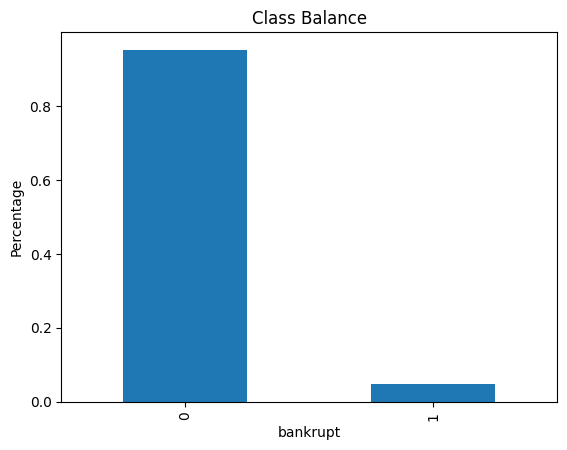

In [9]:
df['bankrupt'].value_counts(normalize=True).plot(kind='bar')
plt.title('Class Balance')
plt.ylabel('Percentage');

# Split

In [10]:
X = df.drop(columns = 'bankrupt')
y = df['bankrupt']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.2, stratify = y, random_state = 42
)

# XGBClassifier

In [12]:
# Pipeline: SimpleImputer + RandomOverSampler + XGBClassifier with GPU

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("ros", RandomOverSampler(random_state=42)),
    ("xgb", XGBClassifier(
        tree_method="hist",        
        device="cuda",             # enable GPU
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    ))
])

In [13]:
# Hyperparameter grid
param_grid = {
    "xgb__n_estimators": [100, 300],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.01, 0.1],
    "xgb__subsample": [0.8, 1.0],
    "xgb__colsample_bytree": [0.6, 0.8],
    "xgb__gamma": [0, 1],
    "xgb__reg_alpha": [0, 0.5],
    "xgb__reg_lambda": [1, 1.5]
}


In [14]:
# GridSearchCV
grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring="f1",    
    cv=3,
    verbose=1,
    n_jobs=-1
)

### Commented after training and saving model
* Trained using GPU for fast training
* Commented for save version

In [15]:
# 5. Train the model

# grid.fit(X_train, y_train)

# Save and Upload Model

In [16]:
# Saving the model to save time

# joblib.dump(grid.best_estimator_, "xgb_tuned_bst.joblib")

In [17]:
# Uploading the model for further analysis
with open('/kaggle/input/bankruptcy-xgb-model/other/default/1/xgb_tuned_bst.joblib', 'rb') as f:
    model = joblib.load(f)

In [18]:
# Extract best hyperparameters

model.named_steps['xgb'].get_params()


{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.8,
 'device': 'cuda',
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'feature_weights': None,
 'gamma': 0,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 7,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 300,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': 0.5,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': 'hist',
 'validate_parameters': None,
 'verbosity': None}

# Confusion Matrix

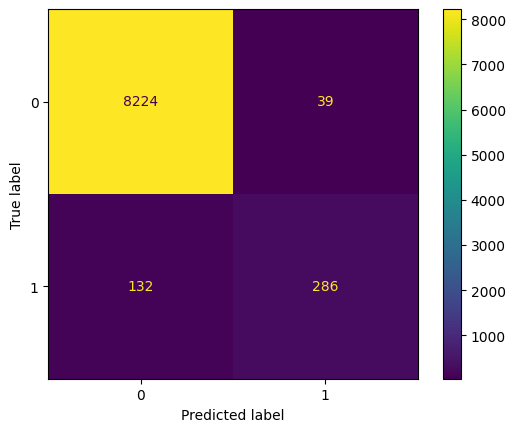

In [19]:
# Confusion Matrix for RandomOverSampler model

ConfusionMatrixDisplay.from_estimator(model,X_test,y_test);

## Interactive confusion matrix

In [20]:
def make_cnf_matrix(threshold):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    y_pred = y_pred_proba > threshold
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)


thresh_widget = widgets.FloatSlider(min=0, max=1, value=0.5, step=0.01)

interact(make_cnf_matrix, threshold=thresh_widget);

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

# Scores

In [21]:
# Scores for XGBoost

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8263
           1       0.88      0.68      0.77       418

    accuracy                           0.98      8681
   macro avg       0.93      0.84      0.88      8681
weighted avg       0.98      0.98      0.98      8681



# Feature Importances

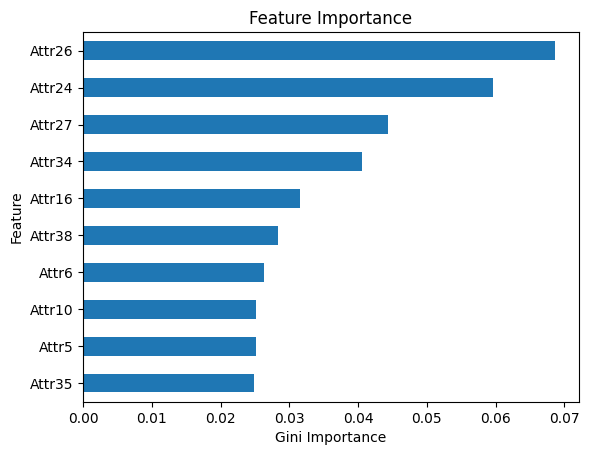

In [22]:
# Get feature names from training data
features = X_train.columns

# Extract importances from model
importances = model.named_steps['xgb'].feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances,index=features).sort_values()

# Plot 10 most important features

feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

# SHAP (SHapley Additive exPlanations)

In financial applications such as bankruptcy prediction, interpretability is critical. Beyond achieving high accuracy, it is essential to understand **why** the model makes certain predictions, especially when used in high-stakes decision-making.

SHAP (SHapley Additive exPlanations) is a powerful tool for model interpretation. It assigns each feature an importance value for a particular prediction based on game theory principles. In the context of our bankruptcy prediction model, SHAP helps in the following ways:

- **Transparency**: SHAP explains how each financial feature (e.g., liquidity ratio, leverage, cash flow) contributes to the model's output.
- **Feature Importance**: It reveals which financial indicators most significantly affect bankruptcy risk across the dataset.
- **Individual Prediction Insight**: For a specific firm, SHAP shows how each input feature pushes the prediction toward either "bankrupt" or "non-bankrupt".
- **Regulatory Compliance and Trust**: Interpretability enhances the model's credibility and aids compliance with financial auditing and regulatory standards.

## SHAP values

In [23]:
# Initialize JavaScript (for interactive plots in notebooks)
shap.initjs()

# Use a TreeExplainer for XGBoost
explainer = shap.Explainer(model.named_steps['xgb'])

# Prepare a sample of the test data to explain
X_sample = X_test.sample(100, random_state=42)  # Use a smaller sample for speed
X_sample = X_sample.reset_index(drop=True)

# Compute SHAP values
shap_values = explainer(X_sample)
shap_values[:1]

.values =
array([[-0.01471908, -0.03575335,  0.07868814,  0.01090118,  0.31788796,
        -0.05150162, -0.12045646, -0.01286547, -0.2946189 , -0.08356731,
        -0.1463772 , -0.08437871, -0.38076958, -0.01218736, -0.0668242 ,
        -0.10636507, -0.02372141,  0.03990062, -0.2908836 , -0.05125225,
        -0.3503278 , -0.0933865 , -0.17136602, -0.68659073, -0.5049632 ,
        -0.26035133,  0.02907033, -0.07843496,  0.07898093, -0.22317182,
        -0.05019047, -0.09152631,  0.10480589, -0.08011975, -0.22530119,
         0.17667843,  0.2747547 , -0.36575317, -0.24906556, -0.18082632,
        -0.07725212, -0.12847881, -0.09247017, -0.09469546, -0.02571629,
        -0.5933383 , -0.22512457,  0.1794054 ,  0.20147905, -0.03125716,
        -0.03366861,  0.02403961, -0.03495833, -0.17336044, -0.08620454,
         0.40360793, -0.07626133,  0.9511593 ,  0.09107894,  0.01458823,
        -0.07456465, -0.13877638, -0.14107883, -0.03268563,  0.00451449,
        -0.04082044,  0.050815  ,  0.0372

## Summary plot

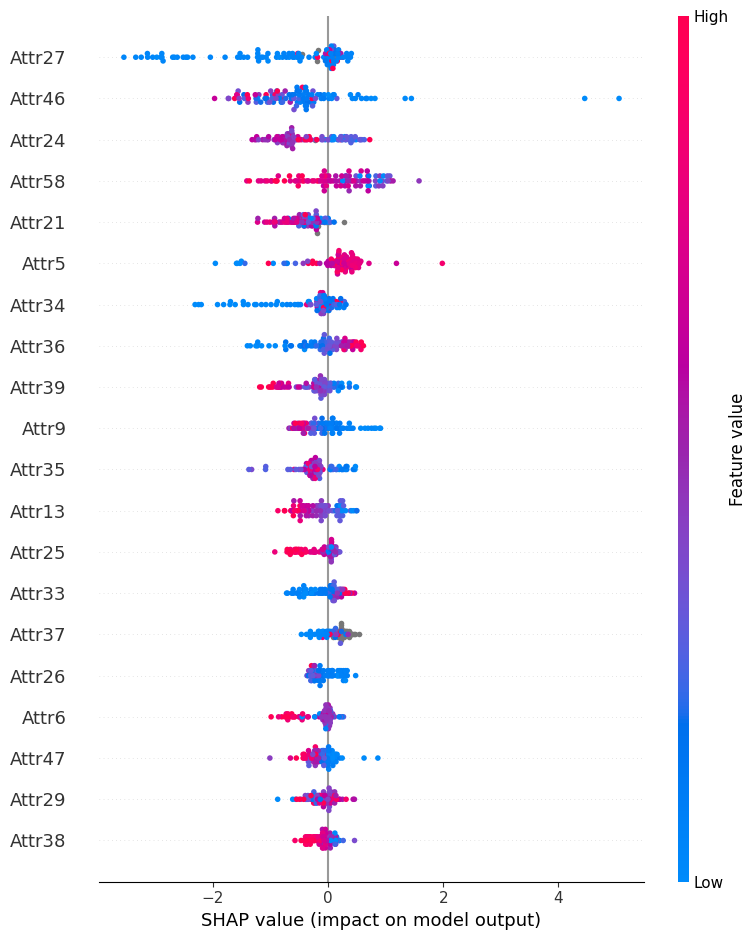

In [24]:
# SHAP summary plot (global feature importance for 100 samples)

shap.summary_plot(shap_values, X_sample)


- Each **dot** represents a prediction and its SHAP value for a feature.
- The **x-axis** shows the **impact on model output** (positive or negative).
- The **color** indicates the **value of the feature**: red = high, blue = low.
- Features like **Attr27**, **Attr46**, and **Attr24** are the **most influential** in predicting bankruptcy.
- For example, a low value of `Attr27` pushes the prediction toward *non-bankruptcy*, while high values may increase bankruptcy risk.

## Waterfall plot (Individual Prediction)

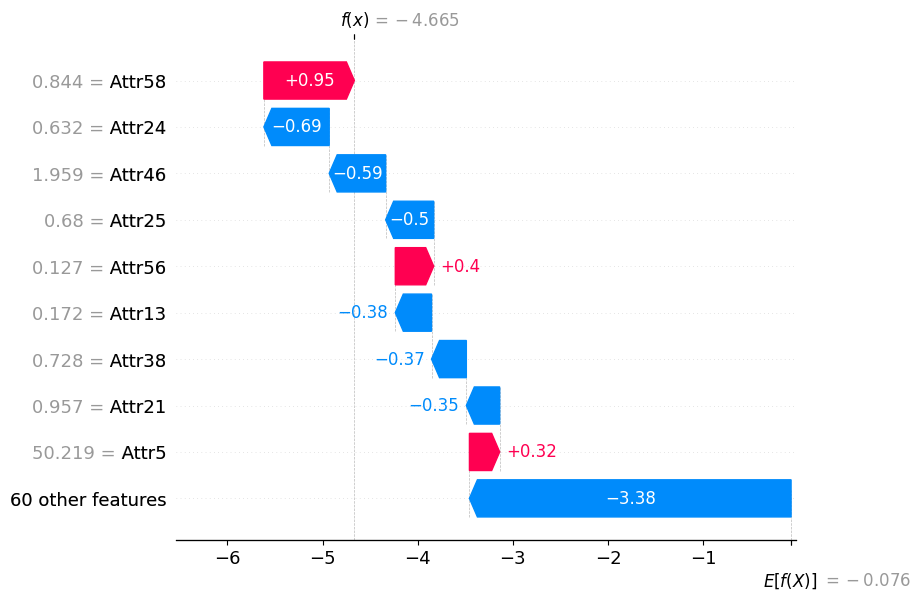

In [25]:
# one sample to explain
i = 0                  # index to any instance
shap.plots.waterfall(shap_values[i])

- This plot explains a **single prediction** in detail.
- The model starts at the **expected value** and adds/subtracts feature contributions.
- **Red segments** push the prediction toward bankruptcy (positive class), while **blue segments** push it toward non-bankruptcy.
- Example: 
  - `Attr58 = 0.844` adds **+0.95** to the bankruptcy score.
  - `Attr5` reduces the bankruptcy score by **−3.38**, helping classify the company as non-bankrupt.

# Conclusion

- SHAP helped interpret the **financial factors influencing bankruptcy** predictions.
- Features like `Attr27`, `Attr24`, and `Attr46` had the **greatest impact** on model decisions.
- This adds **transparency and trust** to our model, which is crucial in sensitive fields like **finance and credit risk assessment**.
- SHAP values enable better **model explainability** to predict bankruptcy.

### Key Financial Ratios (Top SHAP Features)

Below are the top features influencing the bankruptcy prediction model, along with their common financial interpretations:

| **Attribute** | **Financial Ratio Description**                             | **Common Name / Interpretation**            |
|---------------|-------------------------------------------------------------|----------------------------------------------|
| `Attr_46`     | (Current assets − inventory) / short-term liabilities       | **Quick Ratio** (Acid-Test Ratio)            |
| `Attr_27`     | Profit on operating activities / financial expenses         | **Interest Coverage Ratio**                  |
| `Attr_24`     | Gross profit (in 3 years) / total assets                    | **Gross Profit to Asset Ratio (3-Year Avg.)** |

These features are highly influential in determining a company's financial health and risk of bankruptcy.
